<a href="https://colab.research.google.com/github/lokkyX3/yelp-review/blob/main/yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yelp Review Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

nltk.download('stopwords')
sns.set_style('white')
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

## The Data


In [ ]:
yelp = pd.read_csv('/content/drive/My Drive/Colab Notebooks/yelp.csv')

In [ ]:
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
 10  text length  10000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [ ]:
yelp['text length'] = yelp['text'].apply(len)

## EDA

Let's explore the data


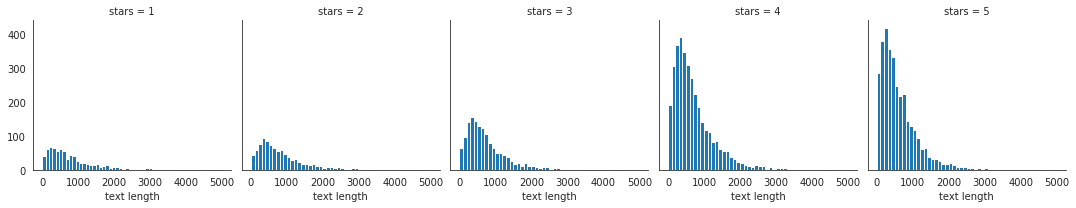

In [ ]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length',bins=50)

The distribution of the text length seems to be the same across all star. But the actual amount of reviews skewd toward 4 and 5 stars

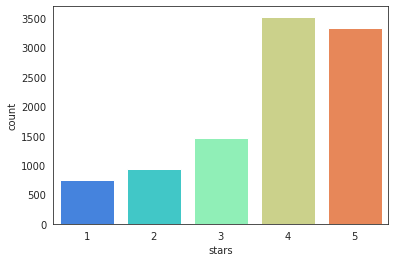

In [ ]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [ ]:
stars = yelp.groupby('stars').mean()

In [ ]:
stars.corr()

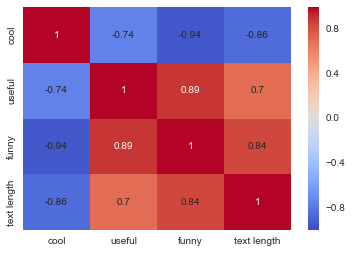

In [ ]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## Text Processing
1 star or 5 stars.


In [ ]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [ ]:
X = yelp_class['text']
y = yelp_class['stars']

In [ ]:
X

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
                              ...                        
9990    Yes I do rock the hipster joints.  I dig this ...
9991    Only 4 stars? \n\n(A few notes: The folks that...
9992    I'm not normally one to jump at reviewing a ch...
9994    Let's see...what is there NOT to like about Su...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 4086, dtype: object

In [ ]:
X.head(5).apply(text_process)

0    [wife, took, birthday, breakfast, excellent, w...
1    [idea, people, give, bad, reviews, place, goes...
3    [Rosie, Dakota, LOVE, Chaparral, Dog, Park, co...
4    [General, Manager, Scott, Petello, good, egg, ...
6    [Drop, youre, drive, ate, go, back, next, day,...
Name: text, dtype: object

In [ ]:
cv = CountVectorizer(analyzer=text_process)
X = cv.fit_transform(X)


<table border = “1“>
<tr>
<th></th> <th>Word_1 Count</th> <th>Word_2 Count</th> <th>...</th> <th>Word_N Count</th> 
</tr>
<tr>
<td><b>Review_1</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Review_2</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Review_N</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>

## Train Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Modelling



In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations


In [ ]:
predictions = nb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[157  71]
 [ 24 974]]


              precision    recall  f1-score   support

           1       0.87      0.69      0.77       228
           5       0.93      0.98      0.95       998

    accuracy                           0.92      1226
   macro avg       0.90      0.83      0.86      1226
weighted avg       0.92      0.92      0.92      1226

